## 1. Import Libs

In [25]:
from __future__ import print_function
import argparse
import os
import matplotlib.pyplot as plt

import torch
from torch.autograd import Variable
import torchvision.transforms as transforms
from util import is_image_file, load_img, save_img

## 2. Setting Hyperparameters

In [27]:
parser = argparse.ArgumentParser()
#parser.add_argument('--dataset', required=False, default='facades', help='facades')
parser.add_argument('--model', required=False, type=str, default='save_model/facades/netG_model_epoch_500.pkl', help='model file to use')
parser.add_argument('--cuda', action='store_true', default=True, help='use cuda')
params = parser.parse_args([])
print(params)

Namespace(cuda=True, model='save_model/facades/netG_model_epoch_500.pkl')


## 3. Testing

In [28]:
netG = torch.load(params.model)

/home/nisnab/miniconda3/envs/tf_gpu_copy/lib/python3.7/site-packages/ipykernel_launcher.py:14: UserWarning: volatile was removed and now has no effect. Use `with torch.no_grad():` instead.
  
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


"import numpy as np\ndef show(img):\n    npimg = img.numpy()\n    plt.imshow(np.transpose(npimg, (1,2,0)), interpolation='nearest')\nshow(out_img)\n\nfrom PIL import Image\nimage = Image.open('img_path.j.convert('RGB')\nplt.imshow(np.transpose(np.asarray(content.squeeze()),(1,2,0)))"

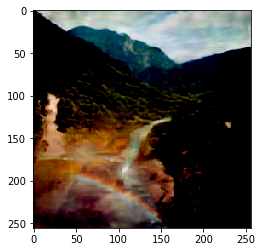

In [38]:
#image_dir = 'dataset/{}/test/a/'.format(params.dataset)
#image_filenames = [x for x in os.listdir(image_dir) if is_image_file(x)]

image_filenames='/home/nisnab/workspace/ImageTranslation/Pix2Pix/dataset/facades/test/a/image1074.png'
# Preprocessing
transform_list = [transforms.ToTensor(), transforms.Normalize((0.5, 0.5, .5), (.5, .5, .5))]
transform = transforms.Compose(transform_list)

#for image_name in image_filenames:
img = load_img(image_filenames)
img = transform(img)
    
    # 모델에 맞는 텐서구조로 변경
input = Variable(img, volatile=True).view(1, -1, 256, 256)
    
if params.cuda:
    netG = netG.cuda()
    input = input.cuda()
    
out = netG(input)
out = out.cpu()
out_img = out.data[0]
#print(out_img)    
#plt.imshow(transforms.ToPILImage()(out_img))
#transforms.ToPILImage()(out_img).show()
plt.imshow(out_img.permute(1, 2, 0) )
"""import numpy as np
def show(img):
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1,2,0)), interpolation='nearest')
show(out_img)

from PIL import Image
image = Image.open('img_path.j.convert('RGB')
plt.imshow(np.transpose(np.asarray(content.squeeze()),(1,2,0)))"""

#img_np_arr_reshaped = out_img.reshape(256,256)  # reshape to 2-dims image
##plt.imshow(img_np_arr_reshaped, cmap='gray')

    # generate한 이미지를 저장하는 파일을 생성
    #if not os.path.exists(os.path.join("result", params.dataset)):
    #     os.mkdir(os.path.join('result', params.dataset))
    #save_img(out_img, "result/{}/{}".format(params.dataset, image_name))